In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_csv("logdinamico.txt", sep="\t", header=None, names=["timestamp", "x", "y", "theta", "v", "w"])

data["nanosecs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=\d+, nanosec=)(\d+)(?:\))", row.timestamp).group(1), axis=1)
data["secs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=)(\d+)(?:, nanosec=\d+\))", row.timestamp).group(1), axis=1)

data["g_timestamp"] = data.apply(lambda row: np.float64(row.secs) + np.float64(row.nanosecs) * 10e-10, axis=1)

data

,timestamp,x,y,theta,v,w,nanosecs,secs,g_timestamp
0,"builtin_interfaces.msg.Time(sec=1694565294, na...",-1.999950,-0.500000,0.001260,0.000054,-0.000266,848624255,1694565294,1.694565e+09
1,"builtin_interfaces.msg.Time(sec=1694565294, na...",-1.999950,-0.500000,0.001261,0.000072,-0.000287,875377237,1694565294,1.694565e+09
2,"builtin_interfaces.msg.Time(sec=1694565294, na...",-1.999950,-0.500000,0.001263,0.000078,-0.000290,922241429,1694565294,1.694565e+09
3,"builtin_interfaces.msg.Time(sec=1694565294, na...",-1.999950,-0.500000,0.001265,0.000047,-0.000245,969153717,1694565294,1.694565e+09
4,"builtin_interfaces.msg.Time(sec=1694565295, na...",-1.999950,-0.500000,0.001267,0.000041,-0.000246,5598759,1694565295,1.694565e+09
...,...,...,...,...,...,...,...,...,...
4739,"builtin_interfaces.msg.Time(sec=1694565512, na...",1.250076,-0.703910,-0.866661,0.006651,-0.998197,788755757,1694565512,1.694566e+09
4740,"builtin_interfaces.msg.Time(sec=1694565512, na...",1.250119,-0.703954,-0.900645,0.001325,-1.000021,848367375,1694565512,1.694566e+09
4741,"builtin_interfaces.msg.Time(sec=1694565512, na...",1.250157,-0.703999,-0.934562,0.001747,-0.992195,913403724,1694565512,1.694566e+09
4742,"builtin_interfaces.msg.Time(sec=1694565512, na...",1.250073,-0.703888,-0.967269,-0.049997,-0.940629,969205999,1694565512,1.694566e+09


## a)

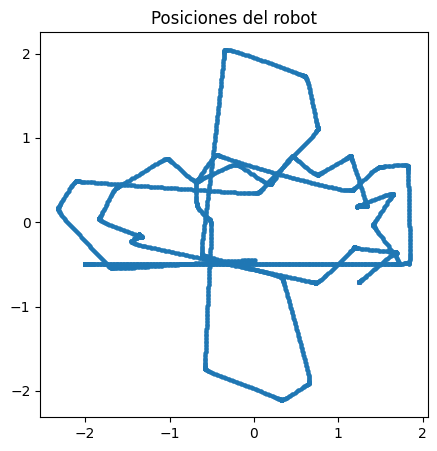

In [3]:
plt.rcParams["figure.figsize"] = (5,5)

plt.scatter(data.x, data.y, marker=".", linewidths=0.1)
plt.title("Posiciones del robot")
plt.savefig("a", dpi=600)
plt.show()

plt.rcParams["figure.figsize"] = (6.4, 4.8)

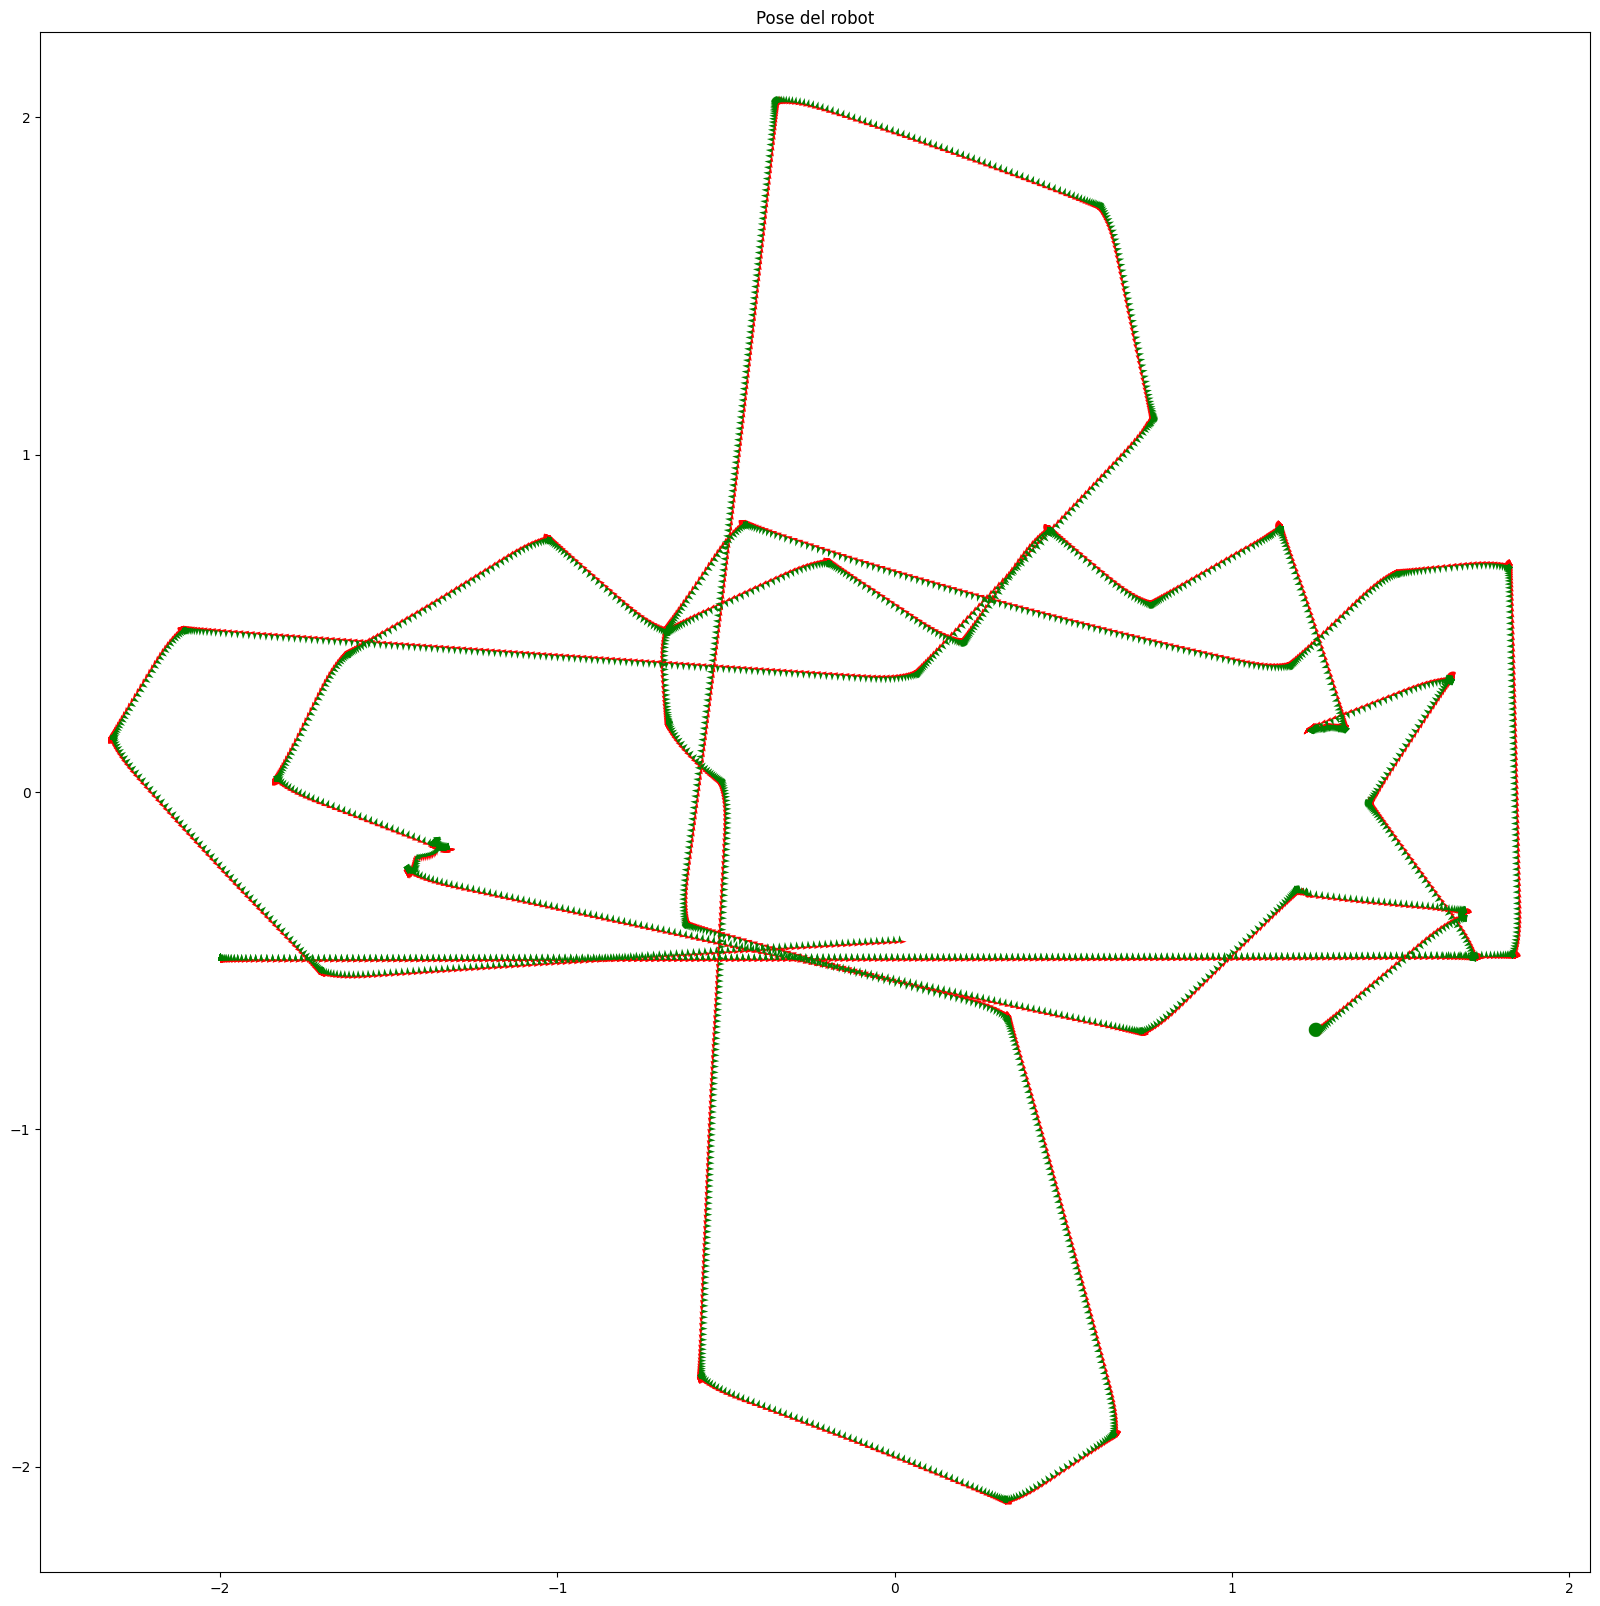

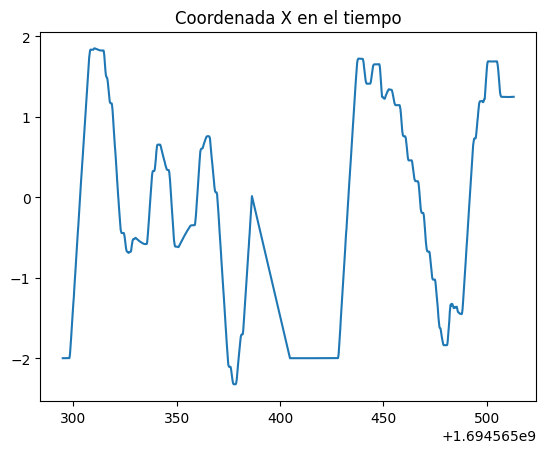

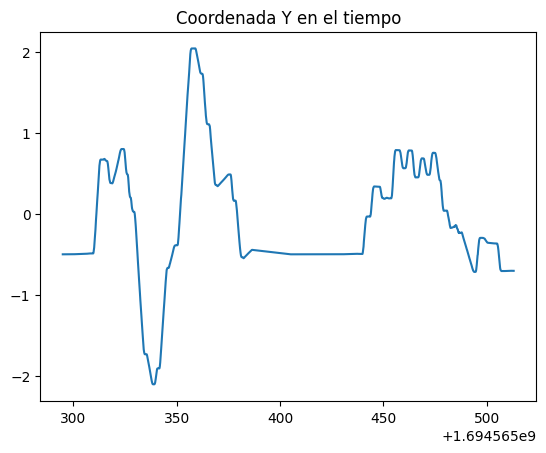

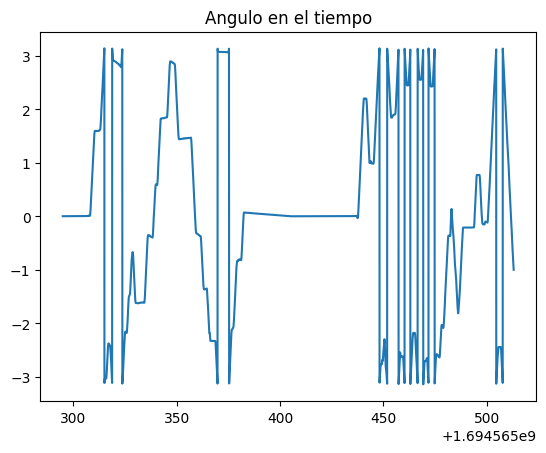

In [9]:
plt.rcParams["figure.figsize"] = (20,20)

plt.quiver(data.x, data.y, np.cos(data.theta), np.sin(data.theta), color='r', units='xy', scale=50, linewidths=1)
plt.quiver(data.x, data.y, -np.sin(data.theta), np.cos(data.theta), color='g', units='xy', scale=50, linewidths=1)

plt.title("Pose del robot")
plt.savefig("b", dpi=600)
plt.show()

plt.rcParams["figure.figsize"] = (6.4, 4.8)

plt.plot(data.g_timestamp, data.x)
plt.title("Coordenada X en el tiempo")
plt.show()

plt.plot(data.g_timestamp, data.y)
plt.title("Coordenada Y en el tiempo")
plt.show()

plt.plot(data.g_timestamp, data.theta)
plt.title("Angulo en el tiempo")
plt.show()

## c)

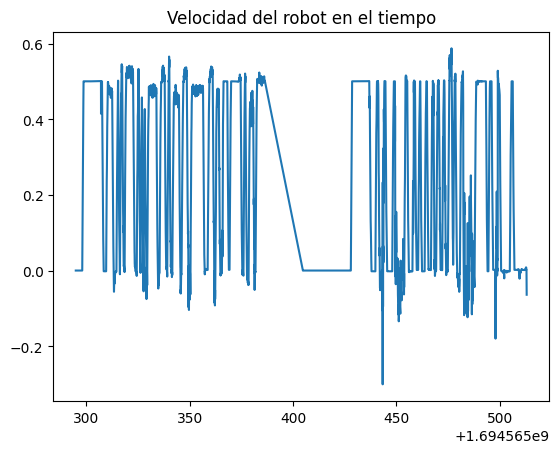

In [5]:
plt.plot(data.g_timestamp, data.v)
plt.title("Velocidad del robot en el tiempo")
plt.savefig("c", dpi=600)
plt.show()